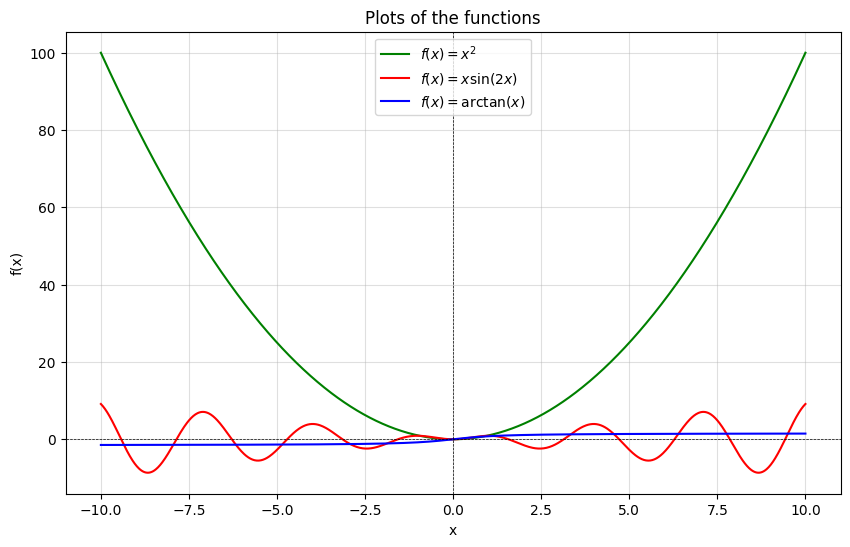

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x = np.linspace(-10, 10, 1000)

# Define the functions
f1 = x**2
f2 = x * np.sin(2 * x)
f3 = np.arctan(x)

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r"$f(x) = x^2$", color="green")
plt.plot(x, f2, label=r"$f(x) = x \sin(2x)$", color="red")
plt.plot(x, f3, label=r"$f(x) = \arctan(x)$", color="blue")

# Add labels, legend, and grid
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plots of the functions")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


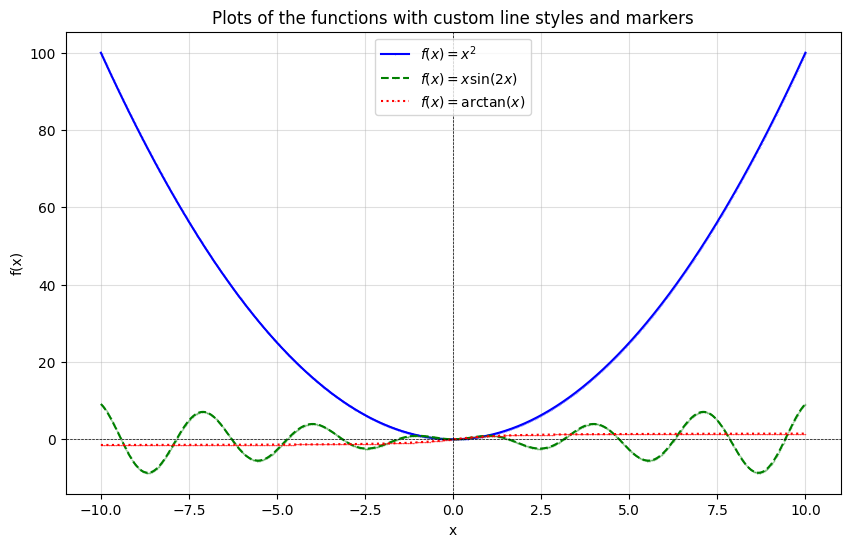

In [5]:
# Plot the functions with updated styles and markers
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r"$f(x) = x^2$", color="blue", linestyle="-", marker="o", markersize=0.1)
plt.plot(x, f2, label=r"$f(x) = x \sin(2x)$", color="green", linestyle="--", marker="s", markersize=0.1)
plt.plot(x, f3, label=r"$f(x) = \arctan(x)$", color="red", linestyle=":", marker="^", markersize=0.1)

# Add labels, legend, and grid
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plots of the functions with custom line styles and markers")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(alpha=0.4)
plt.legend()
plt.show()
